 ## Importações

In [1]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Visualizações

## Área de cobertura do LiDAR

In [2]:
lidar_coverage_area = geopandas.read_file(
    "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2017_LIDAR_COVERAGE_AREA\duc_a01_2017_lidar_coverage_area.shx"
)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\joaov\AppData\Local\Temp\ipykernel_8080\129583235.py:2: SyntaxWarning: invalid escape sequence '\d'
  "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2017_LIDAR_COVERAGE_AREA\duc_a01_2017_lidar_coverage_area.shx"


<Axes: >

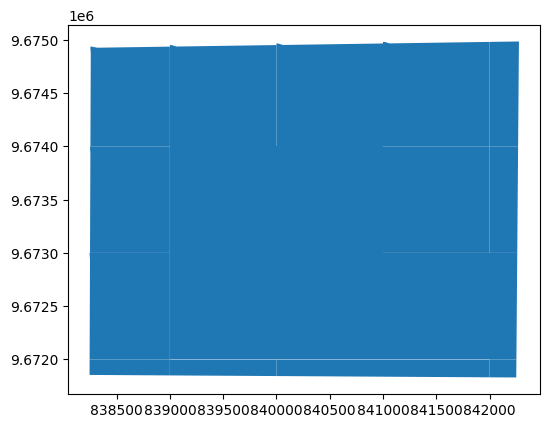

In [3]:
lidar_coverage_area.plot()

## Área de cobertura do inventário

In [4]:
inventory_plot_location = geopandas.read_file(
    "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2016_PLOTLOCATION/duc_a01_2016_plotlocation.shx"
)

<Axes: >

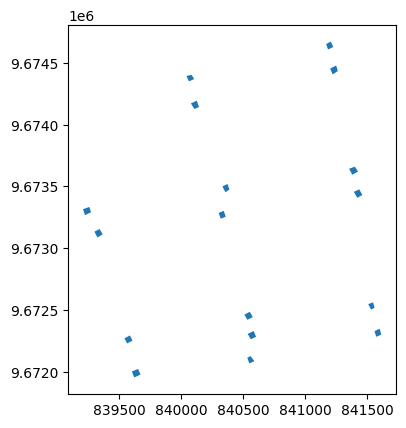

In [5]:
inventory_plot_location.plot()

## Inventário florestal

In [6]:
inventory = pd.read_csv(
    "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2016_inventory.csv",
    encoding="ISO-8859-1",
)

In [7]:
inventory["plot"].unique()

array([ 2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [8]:
inventory.head()

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,date,UTM.Easting,UTM.Northing
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,20160824,840127.0705,9674180.998
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,20160824,840098.9678,9674177.868
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,20160824,840126.4377,9674180.705
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,20160824,840109.4829,9674171.803
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,20160824,840125.6847,9674181.313


In [9]:
s = np.random.randint(10, 220, size=inventory.shape[0])

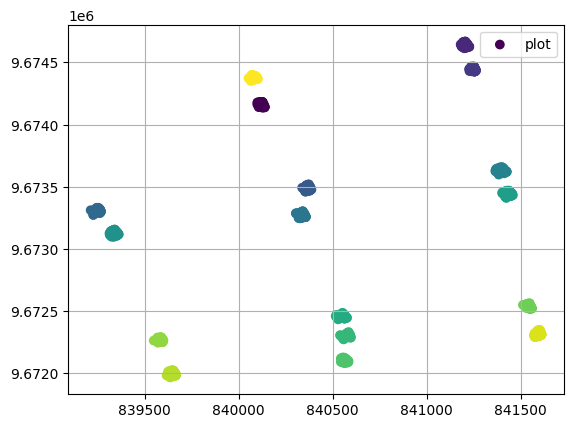

In [10]:
fig, ax = plt.subplots()

ax.scatter(data=inventory, x="UTM.Easting", y="UTM.Northing", c="plot", label="plot")

ax.legend()

ax.grid(True)

plt.show()

In [11]:
from sklearn.cluster import k_means

In [12]:
centroids, label, inertia = k_means(
    X=inventory[["UTM.Easting", "UTM.Northing"]],
    n_clusters=17,
    n_init="auto",
    random_state=0,
)

In [13]:
inventory["label"] = label

<Axes: xlabel='UTM.Easting', ylabel='UTM.Northing'>

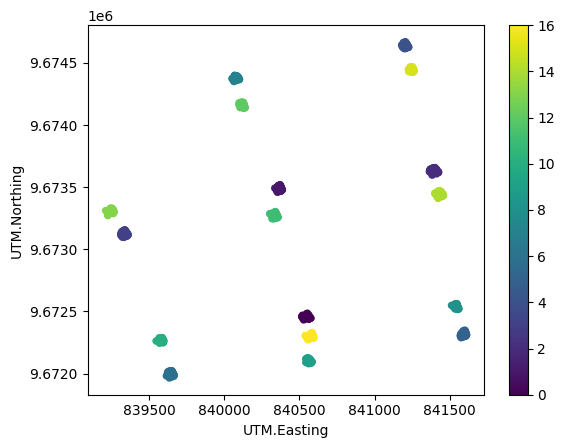

In [14]:
inventory.plot(
    x="UTM.Easting",
    y="UTM.Northing",
    kind="scatter",
    c=inventory["label"],
    colormap="viridis",
)

In [15]:
inventory.head()

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,date,UTM.Easting,UTM.Northing,label
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,20160824,840127.0705,9674180.998,12
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,20160824,840098.9678,9674177.868,12
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,20160824,840126.4377,9674180.705,12
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,20160824,840109.4829,9674171.803,12
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,20160824,840125.6847,9674181.313,12


In [16]:
inventory.count()

area               1169
plot               1169
tree               1169
common.name        1169
scientific.name     986
family.name         986
DBH                1168
type               1169
Dead               1169
D.class              77
date               1169
UTM.Easting        1169
UTM.Northing       1169
label              1169
dtype: int64

In [17]:
inventory["scientific.name"].unique()

array(['Licania guianensis', 'Sacoglottis guianensis', 'Pourouma minor',
       'Pouteria gongrijpii', 'Peltogyne lecointei', nan,
       'Protium paniculatum', 'Qualea paraensis', 'Mouriri collocarpa',
       'Eschweilera ovata', 'Pouteria sp.', 'Ormosia grossa',
       'Ocotea cernua', 'Eperua bijuga', 'Brosimum rubescens',
       'Oenocarpus bataua', 'Hevea brasiliensis', 'Inga thibaudiana',
       'Eriotheca globosa', 'Iryanthera paraensis', 'Dipteryx odorata',
       'Sterculia pruriens', 'Miconia poeppigii', 'Sloanea guianensis',
       'Poeppigia procera', 'Xylopia sp.', 'Neea oppositifolia',
       'Geissospermum sericeum', 'Goupia glabra', 'Eschweilera micrantha',
       'Inga alba', 'Diospyros artanthifolia', 'Eschweilera coriacea',
       'Micrandra minor', 'Trichilia micrantha',
       'Tetragastris panamensis', 'Ormosia coccinea', 'Guarea guidonia',
       'Couepia robusta', 'Pouteria guianensis', 'Ocotea canaliculata',
       'Licania octandra', 'Guatteria schomburgkiana'

In [19]:
len(inventory["scientific.name"].unique())

145

In [20]:
inventory["family.name"].unique()

array(['Chrysobalanaceae', 'Humiriaceae', 'Urticaceae', 'Sapotaceae',
       'Fabaceae', nan, 'Burseraceae', 'Vochysiaceae', 'Melastomataceae',
       'Lecythidaceae', 'Lauraceae', 'Moraceae', 'Arecaceae',
       'Euphorbiaceae', 'Malvaceae', 'Myristicaceae', 'Elaeocarpaceae',
       'Annonaceae', 'Nyctaginaceae', 'Apocynaceae', 'Goupiaceae',
       'Ebenaceae', 'Meliaceae', 'Violaceae', 'Olacaceae',
       'Caryocaraceae', 'Combretaceae', 'Loganiaceae', 'Myrtaceae',
       'Simaroubaceae', 'Rubiaceae', 'Bignoniaceae', 'Malpighiaceae',
       'Salicaceae', 'Boraginaceae', 'Anacardiaceae', 'Lamiaceae',
       'Ochnaceae', 'Clusiaceae', 'Calophyllaceae'], dtype=object)

In [21]:
len(inventory["family.name"].unique())

40

In [27]:
inventory.groupby("scientific.name")["scientific.name"].count().reset_index(
    name="count"
).sort_values(["count"], ascending=False).head(20)

,scientific.name,count
107,Protium paniculatum,89
100,Pouteria gongrijpii,51
44,Eschweilera coriacea,50
90,Oenocarpus bataua,35
54,Helicostylis tomentosa,33
41,Eriotheca globosa,31
46,Eschweilera ovata,30
72,Licania octandra,21
114,Sacoglottis guianensis,19
53,Guatteria schomburgkiana,17
